In [239]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [240]:
df=pd.read_csv(r"D:\Data-Science\DATA Cleaning\my_file (1).csv")

In [241]:
df.isnull().sum()

Rank                                 0
Peak                                11
All Time Peak                       14
Actual gross                         0
Adjusted gross (in 2022 dollars)     0
Artist                               0
Tour title                           0
Year(s)                              0
Shows                                0
Average gross                        0
Ref.                                 0
dtype: int64

In [242]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Rank                              20 non-null     int64 
 1   Peak                              9 non-null      object
 2   All Time Peak                     6 non-null      object
 3   Actual gross                      20 non-null     object
 4   Adjusted gross (in 2022 dollars)  20 non-null     object
 5   Artist                            20 non-null     object
 6   Tour title                        20 non-null     object
 7   Year(s)                           20 non-null     object
 8   Shows                             20 non-null     int64 
 9   Average gross                     20 non-null     object
 10  Ref.                              20 non-null     object
dtypes: int64(2), object(9)
memory usage: 1.8+ KB


In [243]:
df.head()

,Rank,Peak,All Time Peak,Actual gross,Adjusted gross (in 2022 dollars),Artist,Tour title,Year(s),Shows,Average gross,Ref.
0,1,1,2,"$780,000,000","$780,000,000",Taylor Swift,The Eras Tour †,2023–2024,56,"$13,928,571",[1]
1,2,1,7[2],"$579,800,000","$579,800,000",Beyoncé,Renaissance World Tour,2023,56,"$10,353,571",[3]
2,3,1[4],2[5],"$411,000,000","$560,622,615",Madonna,Sticky & Sweet Tour ‡[4][a],2008–2009,85,"$4,835,294",[6]
3,4,2[7],10[7],"$397,300,000","$454,751,555",Pink,Beautiful Trauma World Tour,2018–2019,156,"$2,546,795",[7]
4,5,2[4],NaN,"$345,675,146","$402,844,849",Taylor Swift,Reputation Stadium Tour,2018,53,"$6,522,173",[8]


In [244]:
df.drop(['Ref.'],axis=1,inplace=True)

In [245]:
df['Peak_rank']=df['Peak'].str.split(r'[').str[0]

In [246]:
df['Peak_frequency']=df['Peak'].str.split(r'[').str[1]

In [247]:
df['Peak_frequency']=df['Peak_frequency'].str.extract(r'(\d+)')

In [248]:
df['Peak_frequency'].unique()

array([nan, '4', '7', '10', '20'], dtype=object)

In [249]:
df['Peak_frequency']=df['Peak_frequency'].fillna(1)

In [250]:
df.drop(['Peak'],inplace=True,axis=1)

In [251]:
df.head()

,Rank,All Time Peak,Actual gross,Adjusted gross (in 2022 dollars),Artist,Tour title,Year(s),Shows,Average gross,Peak_rank,Peak_frequency
0,1,2,"$780,000,000","$780,000,000",Taylor Swift,The Eras Tour †,2023–2024,56,"$13,928,571",1,1
1,2,7[2],"$579,800,000","$579,800,000",Beyoncé,Renaissance World Tour,2023,56,"$10,353,571",1,1
2,3,2[5],"$411,000,000","$560,622,615",Madonna,Sticky & Sweet Tour ‡[4][a],2008–2009,85,"$4,835,294",1,4
3,4,10[7],"$397,300,000","$454,751,555",Pink,Beautiful Trauma World Tour,2018–2019,156,"$2,546,795",2,7
4,5,NaN,"$345,675,146","$402,844,849",Taylor Swift,Reputation Stadium Tour,2018,53,"$6,522,173",2,4


In [252]:

df['All_Timepeak_Status']=df['All Time Peak'].apply(lambda x: "Ranked" if pd.notna(x) else "Not ranked")


In [253]:
df['All_Timepeak_Status']=df['All_Timepeak_Status'].map({'Ranked':1,'Not ranked':0}).astype(int)

In [254]:
df.head()

,Rank,All Time Peak,Actual gross,Adjusted gross (in 2022 dollars),Artist,Tour title,Year(s),Shows,Average gross,Peak_rank,Peak_frequency,All_Timepeak_Status
0,1,2,"$780,000,000","$780,000,000",Taylor Swift,The Eras Tour †,2023–2024,56,"$13,928,571",1,1,1
1,2,7[2],"$579,800,000","$579,800,000",Beyoncé,Renaissance World Tour,2023,56,"$10,353,571",1,1,1
2,3,2[5],"$411,000,000","$560,622,615",Madonna,Sticky & Sweet Tour ‡[4][a],2008–2009,85,"$4,835,294",1,4,1
3,4,10[7],"$397,300,000","$454,751,555",Pink,Beautiful Trauma World Tour,2018–2019,156,"$2,546,795",2,7,1
4,5,NaN,"$345,675,146","$402,844,849",Taylor Swift,Reputation Stadium Tour,2018,53,"$6,522,173",2,4,0


In [255]:
print(df.columns.tolist())

['Rank', 'All Time Peak', 'Actual\xa0gross', 'Adjusted\xa0gross (in 2022 dollars)', 'Artist', 'Tour title', 'Year(s)', 'Shows', 'Average gross', 'Peak_rank', 'Peak_frequency', 'All_Timepeak_Status']


In [256]:
df['Actual gross ($)']=df['Actual\xa0gross'].str.replace('$','')

In [257]:
df['Actual gross ($)']=df['Actual gross ($)'].str.replace(',','')

In [258]:
df['Actual gross ($)']=(
    df['Actual gross ($)'].astype(str).str.extract(r'(\d+)').astype(float)
)

In [259]:
df.drop(['Actual\xa0gross'],inplace=True,axis=1)

In [260]:
df['Adjusted gross (in 2022 dollars)']=(df['Adjusted\xa0gross (in 2022 dollars)'].astype(str).str.replace('$','').str.replace(',','').astype(float))

In [261]:
df.drop('Adjusted\xa0gross (in 2022 dollars)',inplace=True,axis=1)

In [262]:
df.rename(columns={'Actual gross':'Actual gross ($)'},inplace =True)

In [ ]:
df.drop('Actual gross',inplace=True,axis=1)

In [222]:
df.head()

,Rank,All Time Peak,Artist,Tour title,Year(s),Shows,Average gross,Peak_rank,Peak_frequency,All_Timepeak_Status,Actual gross ($),Adjusted gross (in 2022 dollars)
0,1,2,Taylor Swift,The Eras Tour †,2023–2024,56,"$13,928,571",1,1,1,780000000.0,780000000.0
1,2,7[2],Beyoncé,Renaissance World Tour,2023,56,"$10,353,571",1,1,1,579800000.0,579800000.0
2,3,2[5],Madonna,Sticky & Sweet Tour ‡[4][a],2008–2009,85,"$4,835,294",1,4,1,411000000.0,560622615.0
3,4,10[7],Pink,Beautiful Trauma World Tour,2018–2019,156,"$2,546,795",2,7,1,397300000.0,454751555.0
4,5,NaN,Taylor Swift,Reputation Stadium Tour,2018,53,"$6,522,173",2,4,0,345675146.0,402844849.0


In [264]:
df['Peak_frequency']=df['Peak_frequency'].astype(int)

In [268]:
df['Peak_rank_status']=df['Peak_rank'].apply(lambda x:'Ranked' if pd.notna(x) else 'Not ranked')

In [270]:
df.drop('Peak_rank',axis=1,inplace=True)

In [271]:
df.head()

,Rank,All Time Peak,Artist,Tour title,Year(s),Shows,Average gross,Peak_frequency,All_Timepeak_Status,Actual gross ($),Adjusted gross (in 2022 dollars),Peak_rank_status
0,1,2,Taylor Swift,The Eras Tour †,2023–2024,56,"$13,928,571",1,1,780000000.0,780000000.0,Ranked
1,2,7[2],Beyoncé,Renaissance World Tour,2023,56,"$10,353,571",1,1,579800000.0,579800000.0,Ranked
2,3,2[5],Madonna,Sticky & Sweet Tour ‡[4][a],2008–2009,85,"$4,835,294",4,1,411000000.0,560622615.0,Ranked
3,4,10[7],Pink,Beautiful Trauma World Tour,2018–2019,156,"$2,546,795",7,1,397300000.0,454751555.0,Ranked
4,5,NaN,Taylor Swift,Reputation Stadium Tour,2018,53,"$6,522,173",4,0,345675146.0,402844849.0,Ranked


In [273]:
df['Average gross']=df['Average gross'].astype(str).str.replace('$','').str.replace(',','').astype(float)

In [282]:
df['Year']=df['Year(s)'].str.replace('–','-')

In [287]:
df[['Start year','End year']]=(
    df['Year'].str.extract(r'(\d{4})(?:-(\d{4}))?').astype(float)
)

In [289]:
df['End year']=df['End year'].fillna(df['Start year'])

In [291]:
df['End year']=df['End year'].astype(int)

In [292]:
df['Start year']=df['Start year'].astype(int)

In [295]:
df.drop('All Time Peak',inplace=True,axis=1)

In [296]:
df.head()

,Rank,Artist,Tour title,Shows,Average gross,Peak_frequency,All_Timepeak_Status,Actual gross ($),Adjusted gross (in 2022 dollars),Peak_rank_status,Year,Start year,End year
0,1,Taylor Swift,The Eras Tour †,56,13928571.0,1,1,780000000.0,780000000.0,Ranked,2023-2024,2023,2024
1,2,Beyoncé,Renaissance World Tour,56,10353571.0,1,1,579800000.0,579800000.0,Ranked,2023,2023,2023
2,3,Madonna,Sticky & Sweet Tour ‡[4][a],85,4835294.0,4,1,411000000.0,560622615.0,Ranked,2008-2009,2008,2009
3,4,Pink,Beautiful Trauma World Tour,156,2546795.0,7,1,397300000.0,454751555.0,Ranked,2018-2019,2018,2019
4,5,Taylor Swift,Reputation Stadium Tour,53,6522173.0,4,0,345675146.0,402844849.0,Ranked,2018,2018,2018


In [301]:
df.drop('Year',inplace=True,axis=1)

In [302]:
df.head()

,Rank,Artist,Tour title,Shows,Average gross,Peak_frequency,All_Timepeak_Status,Actual gross ($),Adjusted gross (in 2022 dollars),Peak_rank_status,Start year,End year
0,1,Taylor Swift,The Eras Tour †,56,13928571.0,1,1,780000000.0,780000000.0,Ranked,2023,2024
1,2,Beyoncé,Renaissance World Tour,56,10353571.0,1,1,579800000.0,579800000.0,Ranked,2023,2023
2,3,Madonna,Sticky & Sweet Tour ‡[4][a],85,4835294.0,4,1,411000000.0,560622615.0,Ranked,2008,2009
3,4,Pink,Beautiful Trauma World Tour,156,2546795.0,7,1,397300000.0,454751555.0,Ranked,2018,2019
4,5,Taylor Swift,Reputation Stadium Tour,53,6522173.0,4,0,345675146.0,402844849.0,Ranked,2018,2018


In [304]:
df[['Artist', 'Average gross', 'Shows']].info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Artist         20 non-null     object 
 1   Average gross  20 non-null     float64
 2   Shows          20 non-null     int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 612.0+ bytes


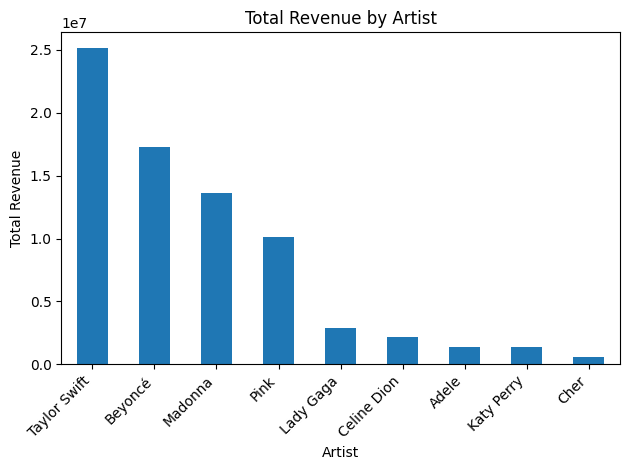

In [311]:

artist_revenue = (
    df.groupby('Artist')['Average gross']
    .sum()
    .sort_values(ascending=False)
)

artist_revenue.plot(kind='bar')
plt.title('Total Revenue by Artist')
plt.xlabel('Artist')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Text(0, 0.5, 'Total Revenue')

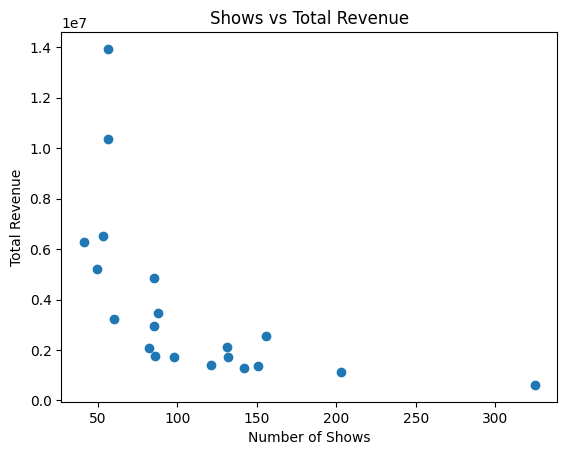

In [315]:

plt.scatter(df['Shows'], df['Average gross'])
plt.title('Shows vs Total Revenue')
plt.xlabel('Number of Shows')
plt.ylabel('Total Revenue')



<BarContainer object of 1 artists>

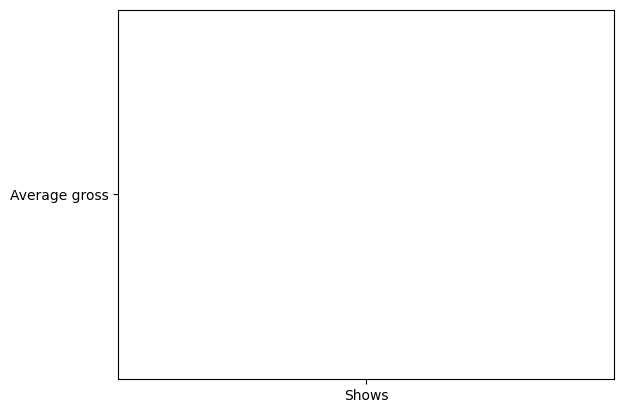

In [319]:
plt.bar('Shows','Average gross')

In [318]:
df.head()

,Rank,Artist,Tour title,Shows,Average gross,Peak_frequency,All_Timepeak_Status,Actual gross ($),Adjusted gross (in 2022 dollars),Peak_rank_status,Start year,End year
0,1,Taylor Swift,The Eras Tour †,56,13928571.0,1,1,780000000.0,780000000.0,Ranked,2023,2024
1,2,Beyoncé,Renaissance World Tour,56,10353571.0,1,1,579800000.0,579800000.0,Ranked,2023,2023
2,3,Madonna,Sticky & Sweet Tour ‡[4][a],85,4835294.0,4,1,411000000.0,560622615.0,Ranked,2008,2009
3,4,Pink,Beautiful Trauma World Tour,156,2546795.0,7,1,397300000.0,454751555.0,Ranked,2018,2019
4,5,Taylor Swift,Reputation Stadium Tour,53,6522173.0,4,0,345675146.0,402844849.0,Ranked,2018,2018


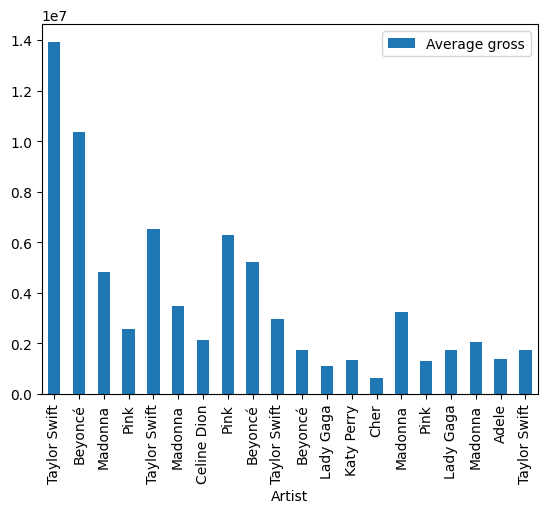

In [321]:
df.plot(x='Artist', y='Average gross', kind='bar')
plt.show()
